In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import datetime as dt

In [109]:
ca = pd.read_csv("Resources/Disaster Data/ca_disaster.csv")
il = pd.read_csv("Resources/Disaster Data/il_disaster.csv")
fl = pd.read_csv("Resources/Disaster Data/fl_disaster.csv")

ca

,Unnamed: 0,Begin_Date,Begin_Month,Year,Event_Type,Deaths,Damage_Property,State,Total_Disaster
0,1143,4/28/1996,Apr,1996,Wildfire,0,0,California,1
1,1144,4/29/1996,Apr,1996,Wildfire,0,0,California,1
2,1145,5/1/1996,May,1996,Wildfire,0,0,California,1
3,1146,5/11/1996,May,1996,Wildfire,0,0,California,1
4,1147,8/14/1996,Aug,1996,Wildfire,0,0,California,1
...,...,...,...,...,...,...,...,...,...
1269,2412,7/20/2020,Jul,2020,Wildfire,0,0,California,1
1270,2413,7/21/2020,Jul,2020,Wildfire,0,0,California,1
1271,2414,7/22/2020,Jul,2020,Wildfire,0,0,California,1
1272,2415,7/24/2020,Jul,2020,Wildfire,0,0,California,1


In [110]:
ca_df = ca[["Year", "State", "Total_Disaster"]]
ca_df

,Year,State,Total_Disaster
0,1996,California,1
1,1996,California,1
2,1996,California,1
3,1996,California,1
4,1996,California,1
...,...,...,...
1269,2020,California,1
1270,2020,California,1
1271,2020,California,1
1272,2020,California,1


In [111]:
ca_df = ca_df.groupby("Year").sum()
il_df = il_df.groupby("Year").sum()
fl_df = fl_df.groupby("Year").sum()

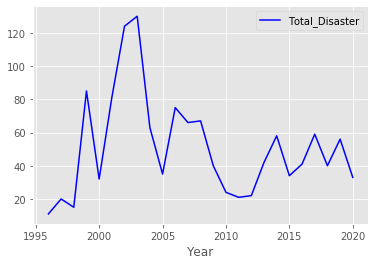

In [112]:
register_matplotlib_converters()
plt.style.use("ggplot")

ca_df.plot(color=["Blue"])

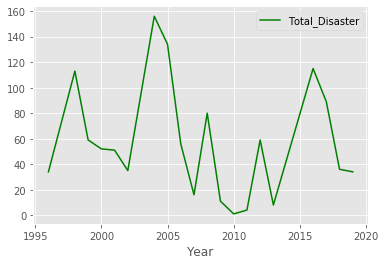

In [113]:
register_matplotlib_converters()
plt.style.use("ggplot")

fl_df.plot(color=["Green"])

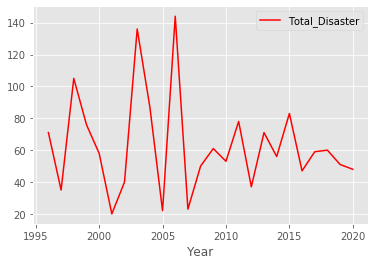

In [114]:
register_matplotlib_converters()
plt.style.use("ggplot")

il_df.plot(color=["Red"])

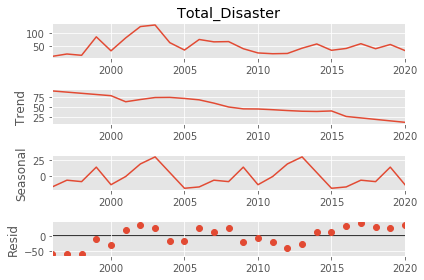

In [115]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ca_df["Total_Disaster"], model='additive', extrapolate_trend='freq', period=10)
fig = result.plot()

In [116]:
from fbprophet import Prophet
model = Prophet(weekly_seasonality=True)
train_df = ca_df.rename(columns={"Total_Disaster": "y"})
train_df
train_df["ds"] = train_df.index
train_df
model.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


Total Disasters vs. Date Forecast for California 1996-2119


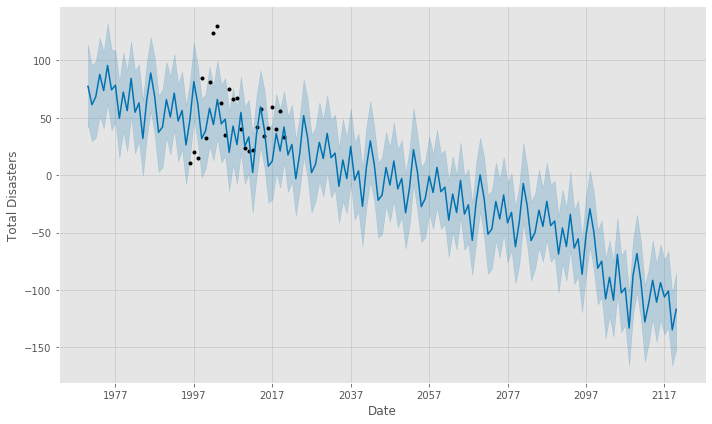

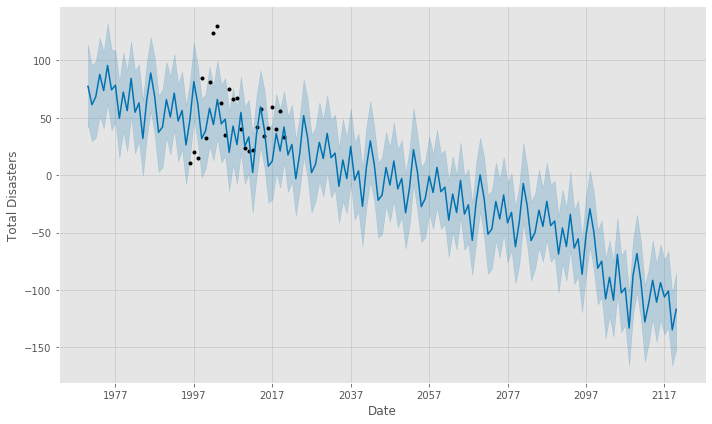

In [117]:
pd.plotting.register_matplotlib_converters()

# We want to forecast over the next 30 years
future = model.make_future_dataframe(150, freq= 'Y')
forecast = model.predict(future)

ca_predict = forecast[["ds", "yhat"]]

print("Total Disasters vs. Date Forecast for California 1996-2119")
model.plot(forecast, uncertainty=True, plot_cap=True, xlabel="Date", ylabel="Total Disasters")

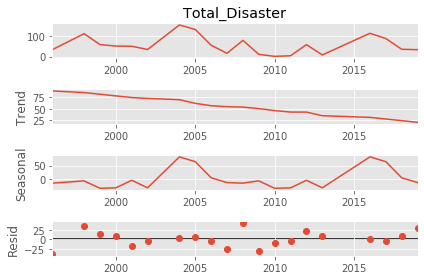

In [118]:
# Florida Disaster Data
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(fl_df["Total_Disaster"], model='additive', extrapolate_trend='freq', period=10)
fig = result.plot()

In [119]:
from fbprophet import Prophet
model = Prophet(weekly_seasonality=True)
train_df = fl_df.rename(columns={"Total_Disaster": "y"})
train_df
train_df["ds"] = train_df.index
train_df
model.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


Total Disasters vs. Date Forecast for California 1996-2119


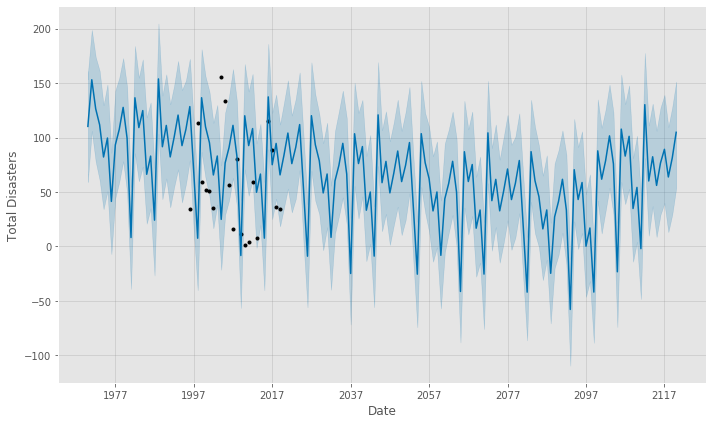

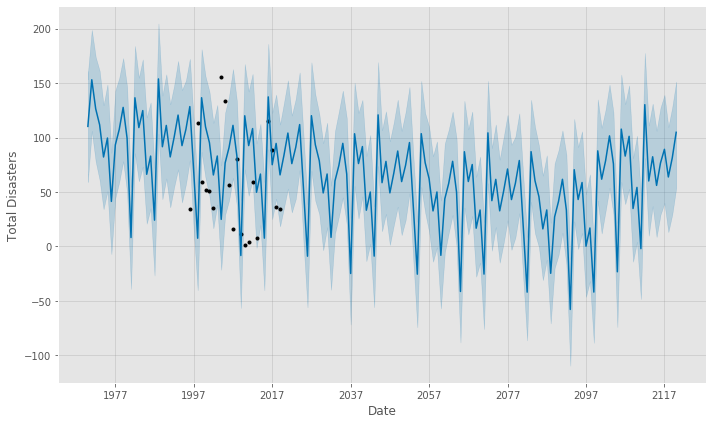

In [120]:
pd.plotting.register_matplotlib_converters()

# We want to forecast over the next 30 years
future = model.make_future_dataframe(150, freq= 'Y')
forecast = model.predict(future)

fl_predict = forecast[["ds", "yhat"]]

print("Total Disasters vs. Date Forecast for California 1996-2119")
model.plot(forecast, uncertainty=True, plot_cap=True, xlabel="Date", ylabel="Total Disasters")

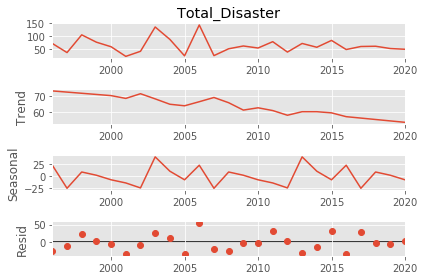

In [121]:
# Illinois Disaster Data
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(il_df["Total_Disaster"], model='additive', extrapolate_trend='freq', period=10)
fig = result.plot()

In [122]:
from fbprophet import Prophet
model = Prophet(weekly_seasonality=True)
train_df = il_df.rename(columns={"Total_Disaster": "y"})
train_df
train_df["ds"] = train_df.index
train_df
model.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


Total Disasters vs. Date Forecast for California 1996-2119


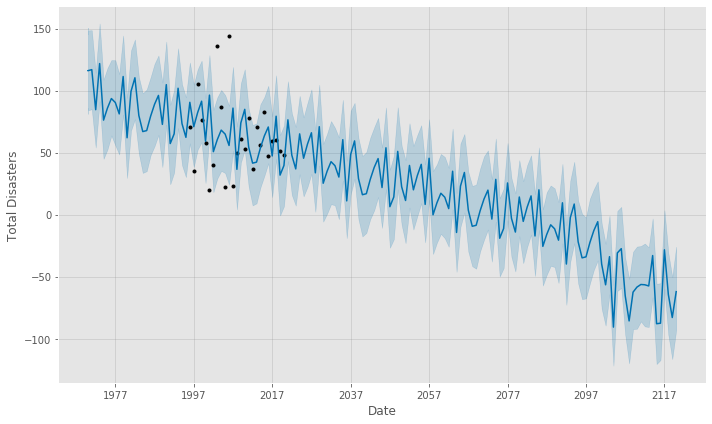

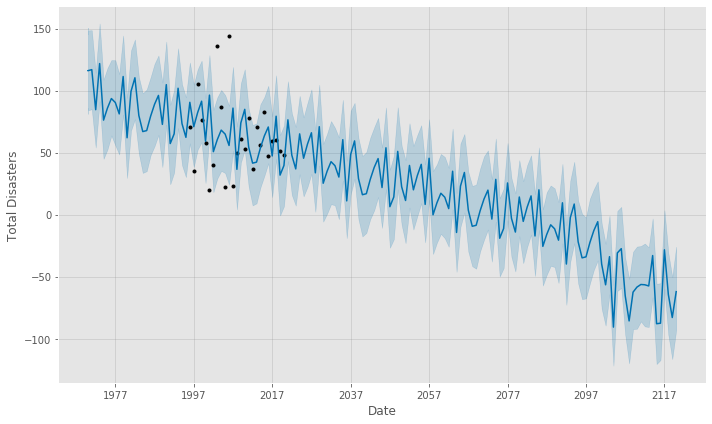

In [123]:
pd.plotting.register_matplotlib_converters()

# We want to forecast over the next 30 years
future = model.make_future_dataframe(150, freq= 'Y')
forecast = model.predict(future)

il_predict = forecast[["ds", "yhat"]]

print("Total Disasters vs. Date Forecast for California 1996-2119")
model.plot(forecast, uncertainty=True, plot_cap=True, xlabel="Date", ylabel="Total Disasters")

In [124]:
ca_predict["State"] = "California"
il_predict["State"] = "Illinois"
fl_predict["State"] = "Florida"

frames = [ca_predict, fl_predict, il_predict]

disaster_df = pd.concat(frames)

disaster_df


disaster_df["ds"] = pd.to_datetime(disaster_df["ds"], format="%Y-%m-%d")
disaster_df["year"] = disaster_df["ds"].dt.strftime("%Y").astype(int)


C:\Users\cbere\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [125]:
disasters = disaster_df.loc[disaster_df["year"] >= 1996]

disasters = disasters[["yhat", "year", "State"]]
disasters = disasters.rename(columns={"yhat": "Total_Disasters (Predicted)", "year":"Year"})

In [126]:
disasters.to_csv("Resources/StateDisasterByYearPredicted.csv")